# Install Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Preparation

In [2]:
df = pd.read_csv('data.csv') # read the data
len(df) # number of rows

11914

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')  # clean up column names
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [5]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index) # get columns with string data
string_columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [6]:
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ','_') # clean up string data

In [7]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# Exploratory data analysis

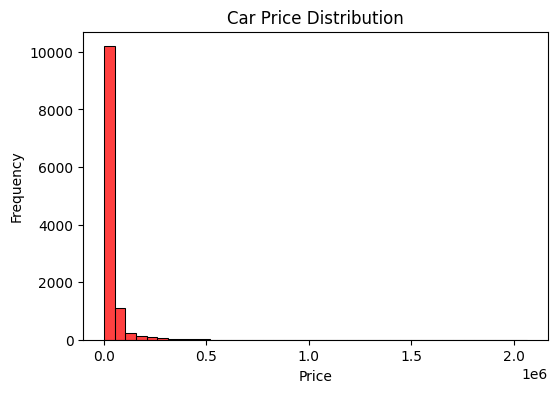

In [8]:
plt.figure(figsize=(6,4)) # set the size of the plot

sns.histplot(df.msrp, bins=40, color='red') # plot the histogram
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Car Price Distribution')

plt.show()

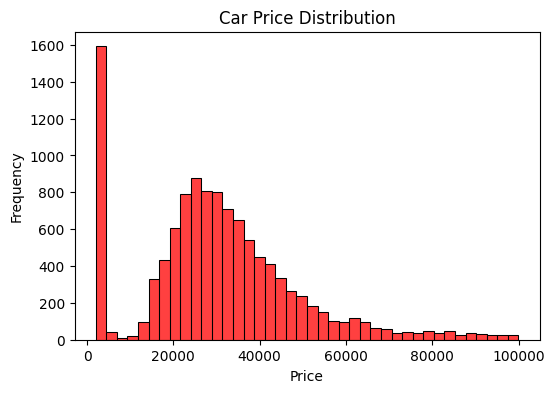

In [9]:
plt.figure(figsize=(6,4)) # set the size of the plot

sns.histplot(df.msrp[df.msrp < 100000], bins=40, color='red') # plot the histogram

plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Car Price Distribution')

plt.show()

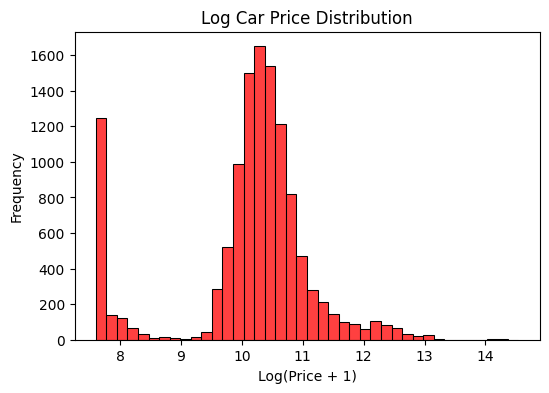

In [10]:
log_price = np.log1p(df.msrp) # log transform the price

plt.figure(figsize=(6,4)) # set the size of the plot

sns.histplot(log_price, bins=40, color='red') # plot the histogram

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)') # add 1 to avoid log(0)
plt.title('Log Car Price Distribution')

plt.show()

In [11]:
df.isnull().sum() # check for missing values

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# Validation Framework

In [12]:
np.random.seed(2) # set the seed for reproducibility of the results

n = len(df) # number of rows in the data

n_val = int(0.2 * n) # 20% of the data for validation
n_test = int(0.2 * n) # 20% of the data for testing
n_train = n - (n_val + n_test) # the rest for training


In [13]:
idx = np.arange(n) # create an array of indices from 0 to n-1
np.random.shuffle(idx) # shuffle the indices to split the data randomly
print(idx)
df_shuffled = df.iloc[idx] # shuffle the data using the shuffled indices

[2735 6720 5878 ... 6637 2575 7336]


In [14]:
df_train = df_shuffled.iloc[:n_train].copy() # get the training data from the shuffled data
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy() # get the validation data from the shuffled data
df_test = df_shuffled.iloc[n_train+n_val:].copy() # get the testing data from the shuffled data

In [15]:
y_train_orig = df_train.msrp.values # get the target variable for training
y_val_orig = df_val.msrp.values # get the target variable for validation
y_test_orig = df_test.msrp.values # get the target variable for testing

In [16]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [17]:
del df_train['msrp'] # remove the target variable from the training data
del df_val['msrp'] # remove the target variable from the validation data
del df_test['msrp'] # remove the target variable from the testing data

# Linear Regression

In [18]:
def train_linear_regression (X, y):
    ones = np.ones(X.shape[0]) # create an array of ones with the length of the number of rows in the data
    X = np.column_stack([ones, X]) # add the column of ones to the data

    XTX = X.T.dot(X) # calculate the dot product of X transpose and X
    XTX_inv = np.linalg.inv(XTX) # calculate the inverse of the dot product
    w = XTX_inv.dot(X.T).dot(y) # calculate the weights

    return w[0], w[1:] # return the bias and the weights

# Baseline Solution

In [19]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity'] # base features

In [20]:
def prepare_X(df):
    df_num = df[base] # get the base features
    df_num = df_num.fillna(0) # fill missing values with 0
    X = df_num.values
    return X

In [21]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [22]:
y_pred = w_0 + X_train.dot(w)
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111])

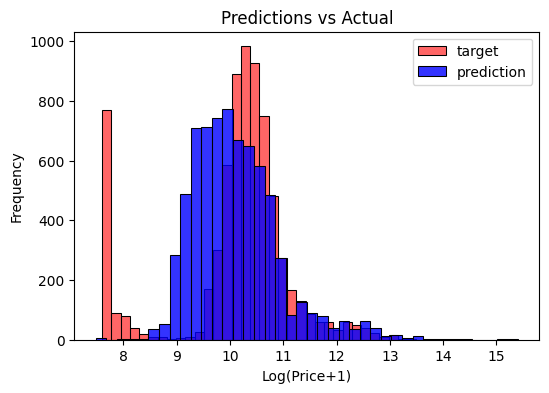

In [23]:
plt.figure(figsize=(6,4))

sns.histplot(y_train, label='target', color = 'red', alpha = 0.6, bins =40)
sns.histplot(y_pred, label='prediction', color='blue', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price+1)')
plt.title('Predictions vs Actual')

plt.show()

# Root Mean Square Error

In [24]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [25]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

In [26]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
y_pred

array([ 9.86288014, 10.37013608,  9.69868129, ..., 10.4916625 ,
        9.57091361, 10.40022147])

In [27]:
rmse(y_val, y_pred)

np.float64(0.7616530991301601)

# Simple Feature Engineering

In [28]:
df_train['year'].max()

np.int64(2017)

In [29]:
def prepare_X(df):

    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    df_num = df[features] 
    df_num = df_num.fillna(0) # fill missing values with 0
    X = df_num.values
    return X

In [30]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('Validation', rmse(y_val, y_pred))

train 0.5175055465840046
Validation 0.5172055461058309


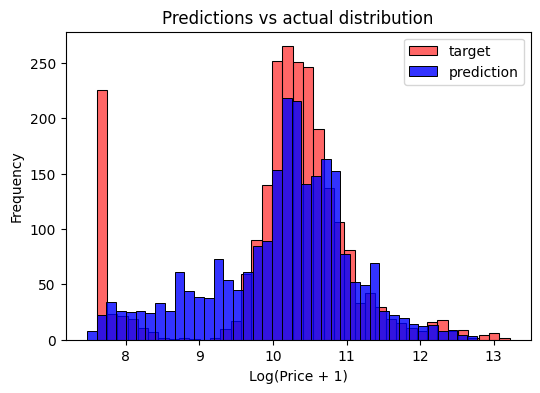

In [31]:
plt.figure(figsize=(6, 4))


sns.histplot(y_val, label='target', color='red', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='blue', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

# Categorial Variables

In [32]:
categorical_variables = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 
    'market_category', 'vehicle_size', 'vehicle_style'
]

In [33]:
categories = {}
for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [34]:
categories.items()

dict_items([('make', ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']), ('engine_fuel_type', ['regular_unleaded', 'premium_unleaded_(required)', 'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)', 'diesel']), ('transmission_type', ['automatic', 'manual', 'automated_manual', 'direct_drive', 'unknown']), ('driven_wheels', ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']), ('market_category', ['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback']), ('vehicle_size', ['compact', 'midsize', 'large']), ('vehicle_style', ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback'])])

In [35]:
def prepare_X(df):
    df = df.copy() # create a copy of the dataframe
    features = base.copy() # create a copy of the base features

    df['age'] = 2017 - df.year # calculate the age of the car
    features.append('age') # add age to the features

    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v) # add the binary feature to the features

    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c, v))
            
    df_num = df[features] # select the features
    df_num = df_num.fillna(0) # fill missing values with 0
    X = df_num.values # convert the dataframe to a numpy array
    return X

In [36]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 780.2041396335118
validation: 362.4577835979445


In [37]:
w_0

np.float64(1.440606248143078e+17)

# Regularization

In [38]:
def train_linear_regression (X, y, r=0.0):
    ones = np.ones(X.shape[0]) # create an array of ones with the length of the number of rows in the data
    X = np.column_stack([ones, X]) # add the column of ones to the data

    XTX = X.T.dot(X) # calculate the dot product of X transpose and X
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    
    XTX_inv = np.linalg.inv(XTX) # calculate the inverse of the dot product
    w = XTX_inv.dot(X.T).dot(y) # calculate the weights

    return w[0], w[1:] # return the bias and the weights

In [76]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)


# Parameter Tuning

In [73]:
for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print("reg parameter: ",r, "bias term: ",w_0, "rmse: ",score)

reg parameter:  1e-06 bias term:  165.61143939701498 rmse:  0.4565168054011749
reg parameter:  0.0001 bias term:  6.261832139272904 rmse:  0.4565170623990586
reg parameter:  0.001 bias term:  6.2852910684348435 rmse:  0.4565175084418286
reg parameter:  0.01 bias term:  6.276603508947719 rmse:  0.45652199011980954
reg parameter:  0.1 bias term:  6.1912086564231075 rmse:  0.456569276299649
reg parameter:  1 bias term:  5.634896667796192 rmse:  0.45722043179946525
reg parameter:  5 bias term:  4.7533425477329745 rmse:  0.46229300167379256
reg parameter:  10 bias term:  4.2839801089569445 rmse:  0.47014569320994676


In [ ]:
r = 0.001

w0, w = train_linear_regression(X_train, y_train, r=r)
y_pred = w0 + X_val.dot(w)
 
score = rmse(y_val, y_pred)
    
print("rmse: ",score)
# Output: rmse:  0.4568807317131709

rmse:  0.4565175084418286


In [77]:
X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print("rmse: ",score)


rmse:  0.4565175084418286


# Using the Model

In [81]:
df_full_train = pd.concat([df_train, df_val])
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11123,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870
5549,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238
4146,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624
6337,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436


In [83]:
df_full_train = df_full_train.reset_index(drop=True)
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870
9528,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238
9529,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624
9530,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436


In [84]:
y_full_train = np.concatenate([y_train, y_val])
y_full_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 11.21756062,
        9.77542688, 10.1924563 ])

In [85]:
X_full_train = prepare_X(df_full_train) 
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [87]:
w0, w = train_linear_regression(X_full_train, y_full_train, r=0.001)
w0, w

(np.float64(6.322496744875648),
 array([ 1.52506339e-03,  1.18188694e-01, -6.66105604e-03, -5.33413925e-03,
        -4.87603206e-05, -9.69091841e-02, -7.92621164e-01, -8.90862370e-01,
        -6.35101095e-01, -4.14339209e-02,  1.75560743e-01, -5.78068248e-04,
        -1.00563875e-01, -9.27549642e-02, -4.66859122e-01,  7.98659617e-02,
        -3.16047670e-01, -5.51981644e-01, -7.89525676e-02,  1.09454876e+00,
         9.19241220e-01,  1.14881862e+00,  2.65195452e+00,  5.09177831e-01,
         1.62955588e+00,  1.53025994e+00,  1.61743866e+00,  1.54543805e+00,
        -9.70559762e-02,  3.73062093e-02, -5.81767474e-02, -2.35940831e-02,
        -1.19357136e-02,  2.18895262e+00,  2.07458272e+00,  2.05916687e+00,
        -5.00802769e-02,  5.62184639e-02,  1.84794024e-01,  3.32646151e-01,
        -1.58817038e-01]))

In [88]:
X_test

array([[165.,   6.,  20., ...,   0.,   0.,   0.],
       [389.,  12.,  15., ...,   1.,   0.,   0.],
       [268.,   6.,  25., ...,   0.,   0.,   0.],
       ...,
       [250.,   6.,  22., ...,   0.,   0.,   0.],
       [174.,   4.,  42., ...,   0.,   0.,   0.],
       [256.,   6.,  27., ...,   0.,   0.,   0.]])

In [89]:
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
print('rmse :', score)

rmse : 0.45177493077570663


In [90]:
df_test.iloc[20]

make                            toyota
model                           sienna
year                              2015
engine_fuel_type      regular_unleaded
engine_hp                        266.0
engine_cylinders                   6.0
transmission_type            automatic
driven_wheels        front_wheel_drive
number_of_doors                    4.0
market_category                    NaN
vehicle_size                     large
vehicle_style        passenger_minivan
highway_mpg                         25
city_mpg                            18
popularity                        2031
Name: 9208, dtype: object

In [91]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [93]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [94]:
X_small = prepare_X(df_small)
X_small

array([[2.660e+02, 6.000e+00, 2.500e+01, 1.800e+01, 2.031e+03, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]])

In [97]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

np.float64(10.462651709779127)

In [98]:
np.expm1(y_pred)

np.float64(34983.196494707816)

In [99]:
np.expm1(y_test[20])

np.float64(35000.00000000001)